In [3]:
#Import dependenies
import os
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas.io.json import json_normalize
import requests
import json
from gmplot import gmplot
import time
import numpy as np
import folium as fl
from yelpapi import YelpAPI
from pprint import pprint
from API import api_key
import seaborn as sns
os.environ['PROJ_LIB'] = "/anaconda3/envs/test/share/proj"

In [4]:
#Get information using Yelp API from Yelp
url = 'https://api.yelp.com/v3/businesses/search'
offset = 0
API = api_key
headers = {'Authorization': 'bearer %s' % API}
business = []

for i in range(0, 500, 50):
    params = {'location': 'Cleveland, Ohio', 'offset': offset, 'limit': 50}
    response = requests.get(url, params=params, headers=headers)
    business.append(response.json())
    offset += 50
    
    if offset % 50 == 0:
        time.sleep(5)
        
business

[{'businesses': [{'id': 'J1RDyyPxhioqm8c_fi4P4Q',
    'alias': 'lola-cleveland',
    'name': 'Lola',
    'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/XuGT-ENxIoteq2fj4OTgdg/o.jpg',
    'is_closed': False,
    'url': 'https://www.yelp.com/biz/lola-cleveland?adjust_creative=TshdU4XV3-ETjsHU3-ICtw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=TshdU4XV3-ETjsHU3-ICtw',
    'review_count': 981,
    'categories': [{'alias': 'wine_bars', 'title': 'Wine Bars'},
     {'alias': 'newamerican', 'title': 'American (New)'}],
    'rating': 4.0,
    'coordinates': {'latitude': 41.49883, 'longitude': -81.69035},
    'transactions': [],
    'price': '$$$',
    'location': {'address1': '2058 E 4th St',
     'address2': '',
     'address3': '',
     'city': 'Cleveland',
     'zip_code': '44115',
     'country': 'US',
     'state': 'OH',
     'display_address': ['2058 E 4th St', 'Cleveland, OH 44115']},
    'phone': '+12166215652',
    'display_phone': '(216) 621-5652',
    

In [5]:
#Create a dataframe
response = business[0]['businesses']
df = pd.DataFrame.from_dict(response)
df.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,lola-cleveland,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...","{'latitude': 41.49883, 'longitude': -81.69035}",(216) 621-5652,3191.079270,J1RDyyPxhioqm8c_fi4P4Q,https://s3-media1.fl.yelpcdn.com/bphoto/XuGT-E...,False,"{'address1': '2058 E 4th St', 'address2': '', ...",Lola,+12166215652,$$$,4.0,981,[],https://www.yelp.com/biz/lola-cleveland?adjust...
1,townhall-cleveland-2,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 41.485492, 'longitude': -81.703914}",(216) 344-9400,2951.385340,LNsZJP6jZ11e0tDljOLPiQ,https://s3-media4.fl.yelpcdn.com/bphoto/ycqFgv...,False,"{'address1': '1909 W 25th St', 'address2': '',...",Townhall,+12163449400,$$,4.0,993,[],https://www.yelp.com/biz/townhall-cleveland-2?...
2,l-albatros-cleveland,"[{'alias': 'french', 'title': 'French'}]","{'latitude': 41.5117439550152, 'longitude': -8...",(216) 791-7880,6953.412053,SzcCJJmreMlWCsNjupdVAA,https://s3-media4.fl.yelpcdn.com/bphoto/QpVBtp...,False,"{'address1': '11401 Bellflower Rd', 'address2'...",L'Albatros,+12167917880,$$$,4.5,604,[],https://www.yelp.com/biz/l-albatros-cleveland?...
3,slymans-restaurant-cleveland,"[{'alias': 'tradamerican', 'title': 'American ...","{'latitude': 41.51286, 'longitude': -81.67125}",(216) 621-3760,4387.852814,1veVZUawy7IhIc5oDpRRQA,https://s3-media2.fl.yelpcdn.com/bphoto/rz2ST-...,False,"{'address1': '3106 Saint Clair Ave NE', 'addre...",Slyman's Restaurant,+12166213760,$$,4.5,417,[],https://www.yelp.com/biz/slymans-restaurant-cl...
4,sokolowskis-university-inn-cleveland,"[{'alias': 'polish', 'title': 'Polish'}, {'ali...","{'latitude': 41.48475, 'longitude': -81.69005}",(216) 771-9236,1942.420138,Xny0n0s98TpP82sQxfgIMQ,https://s3-media2.fl.yelpcdn.com/bphoto/F1jEYU...,False,"{'address1': '1201 University Rd', 'address2':...",Sokolowski's University Inn,+12167719236,$$,4.5,464,[],https://www.yelp.com/biz/sokolowskis-universit...


In [6]:
#Concat all the dataframes into one
full_data = []

for i in business:
    full_data = full_data + i['businesses']

df = pd.DataFrame.from_dict(full_data)
df.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,lola-cleveland,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...","{'latitude': 41.49883, 'longitude': -81.69035}",(216) 621-5652,3191.079270,J1RDyyPxhioqm8c_fi4P4Q,https://s3-media1.fl.yelpcdn.com/bphoto/XuGT-E...,False,"{'address1': '2058 E 4th St', 'address2': '', ...",Lola,+12166215652,$$$,4.0,981,[],https://www.yelp.com/biz/lola-cleveland?adjust...
1,townhall-cleveland-2,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 41.485492, 'longitude': -81.703914}",(216) 344-9400,2951.385340,LNsZJP6jZ11e0tDljOLPiQ,https://s3-media4.fl.yelpcdn.com/bphoto/ycqFgv...,False,"{'address1': '1909 W 25th St', 'address2': '',...",Townhall,+12163449400,$$,4.0,993,[],https://www.yelp.com/biz/townhall-cleveland-2?...
2,l-albatros-cleveland,"[{'alias': 'french', 'title': 'French'}]","{'latitude': 41.5117439550152, 'longitude': -8...",(216) 791-7880,6953.412053,SzcCJJmreMlWCsNjupdVAA,https://s3-media4.fl.yelpcdn.com/bphoto/QpVBtp...,False,"{'address1': '11401 Bellflower Rd', 'address2'...",L'Albatros,+12167917880,$$$,4.5,604,[],https://www.yelp.com/biz/l-albatros-cleveland?...
3,slymans-restaurant-cleveland,"[{'alias': 'tradamerican', 'title': 'American ...","{'latitude': 41.51286, 'longitude': -81.67125}",(216) 621-3760,4387.852814,1veVZUawy7IhIc5oDpRRQA,https://s3-media2.fl.yelpcdn.com/bphoto/rz2ST-...,False,"{'address1': '3106 Saint Clair Ave NE', 'addre...",Slyman's Restaurant,+12166213760,$$,4.5,417,[],https://www.yelp.com/biz/slymans-restaurant-cl...
4,sokolowskis-university-inn-cleveland,"[{'alias': 'polish', 'title': 'Polish'}, {'ali...","{'latitude': 41.48475, 'longitude': -81.69005}",(216) 771-9236,1942.420138,Xny0n0s98TpP82sQxfgIMQ,https://s3-media2.fl.yelpcdn.com/bphoto/F1jEYU...,False,"{'address1': '1201 University Rd', 'address2':...",Sokolowski's University Inn,+12167719236,$$,4.5,464,[],https://www.yelp.com/biz/sokolowskis-universit...


In [7]:
#Clean the dataframe from dictionaries
idx = 0
lats = []
lngs = []
Bus_titles = []
ZIPS = []
for i, r in df.iterrows():
    lat = r["coordinates"]["latitude"]
    lng = r["coordinates"]["longitude"]
    titles = r["categories"][0]["title"]
    ZIP = r["location"]["zip_code"]
    lats.append(lat)
    lngs.append(lng)
    Bus_titles.append(titles)
    ZIPS.append(ZIP)
    
clean_df = pd.DataFrame(data={'Categories': Bus_titles, 'latitude': lats,'longitude':lngs, 'zip_code': ZIPS})
clean_df.head()

,Categories,latitude,longitude,zip_code
0,Wine Bars,41.498830,-81.690350,44115
1,American (New),41.485492,-81.703914,44113
2,French,41.511744,-81.606395,44106
3,American (Traditional),41.512860,-81.671250,44114
4,Polish,41.484750,-81.690050,44113


In [8]:
#Add the cleaned columns into datframe and drop the unnecessary columns
concat_df = pd.concat([df,clean_df], axis=1)

#Drop the columns
yelp = concat_df.drop(columns = ['coordinates', 'categories', 'location'])
yelp.head()

,alias,display_phone,distance,id,image_url,is_closed,name,phone,price,rating,review_count,transactions,url,Categories,latitude,longitude,zip_code
0,lola-cleveland,(216) 621-5652,3191.079270,J1RDyyPxhioqm8c_fi4P4Q,https://s3-media1.fl.yelpcdn.com/bphoto/XuGT-E...,False,Lola,+12166215652,$$$,4.0,981,[],https://www.yelp.com/biz/lola-cleveland?adjust...,Wine Bars,41.498830,-81.690350,44115
1,townhall-cleveland-2,(216) 344-9400,2951.385340,LNsZJP6jZ11e0tDljOLPiQ,https://s3-media4.fl.yelpcdn.com/bphoto/ycqFgv...,False,Townhall,+12163449400,$$,4.0,993,[],https://www.yelp.com/biz/townhall-cleveland-2?...,American (New),41.485492,-81.703914,44113
2,l-albatros-cleveland,(216) 791-7880,6953.412053,SzcCJJmreMlWCsNjupdVAA,https://s3-media4.fl.yelpcdn.com/bphoto/QpVBtp...,False,L'Albatros,+12167917880,$$$,4.5,604,[],https://www.yelp.com/biz/l-albatros-cleveland?...,French,41.511744,-81.606395,44106
3,slymans-restaurant-cleveland,(216) 621-3760,4387.852814,1veVZUawy7IhIc5oDpRRQA,https://s3-media2.fl.yelpcdn.com/bphoto/rz2ST-...,False,Slyman's Restaurant,+12166213760,$$,4.5,417,[],https://www.yelp.com/biz/slymans-restaurant-cl...,American (Traditional),41.512860,-81.671250,44114
4,sokolowskis-university-inn-cleveland,(216) 771-9236,1942.420138,Xny0n0s98TpP82sQxfgIMQ,https://s3-media2.fl.yelpcdn.com/bphoto/F1jEYU...,False,Sokolowski's University Inn,+12167719236,$$,4.5,464,[],https://www.yelp.com/biz/sokolowskis-universit...,Polish,41.484750,-81.690050,44113


In [25]:

grouped_yelp = yelp.groupby(['Categories'], as_index=False).sum()
review = grouped_yelp.sort_values("review_count", ascending=False)
df_1 = review['Categories'].iloc[0:10]
df_2 = review['review_count'].iloc[0:10]


2     8297
3     4071
61    3726
23    3576
7     3409
50    2983
69    2654
99    1597
13    1582
98    1538
Name: review_count, dtype: int64

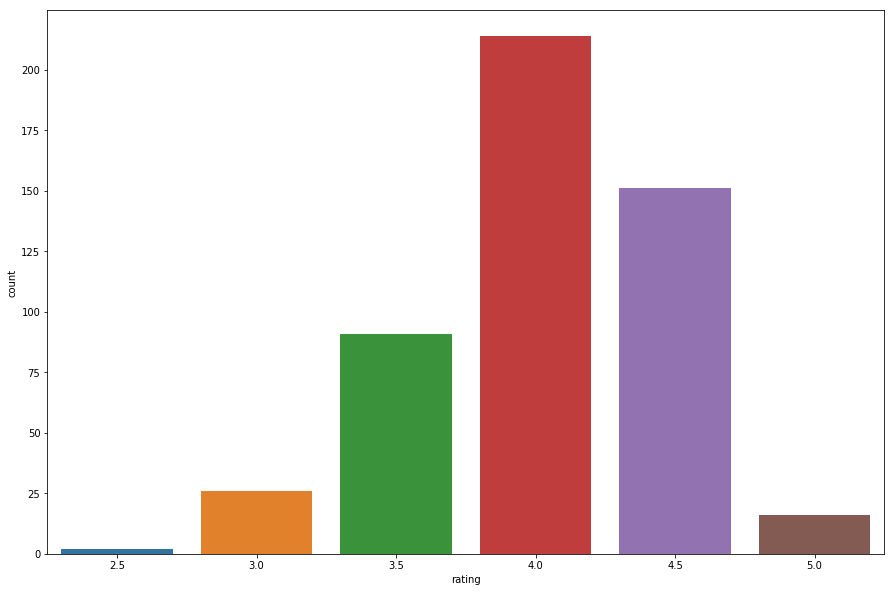

In [19]:
#Use a plot to visualize the frequency of rating
plt.figure(figsize=(15,10))
sns.countplot(x='rating',data=yelp);

#we can see that most of the businesses in cleveland had got a rating of 4.0 with a review count of more than 200.

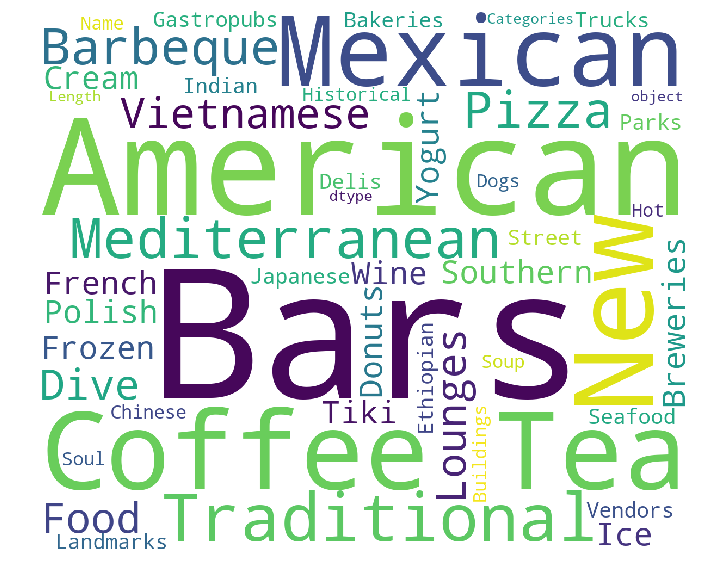

In [11]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(12,10))

wordcloud = WordCloud(background_color='white',
                          width=1200,
                      stopwords = STOPWORDS,
                          height=1000
                         ).generate(str(yelp['Categories']))


plt.imshow(wordcloud)
plt.axis('off');


#top businesses on our dataset. The height of each word in this picture is an indication of frequency of occurrence of the word in the entire text.
#words like mexican, american, bars, coffee and tea are frequently used in the reviews.

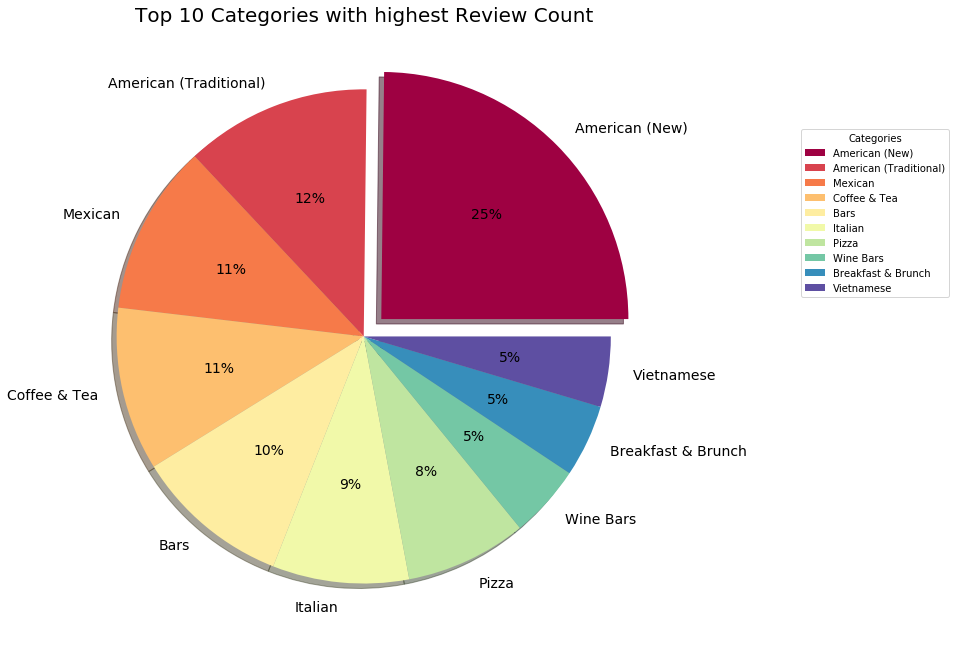

In [63]:
plt.figure(1, figsize=(35,25))
the_grid = GridSpec(2, 2)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 10)]
plt.subplot(the_grid[0, 0], aspect=1)
plt.title('Top 10 Categories with highest Review Count', fontsize=20)
pie = plt.pie(df_2,labels=df_1, autopct='%.0f%%', shadow=True, colors=colors, explode=explode, textprops={'fontsize': 14})
plt.legend(df_1,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1.2, 0.2, 0, 1))


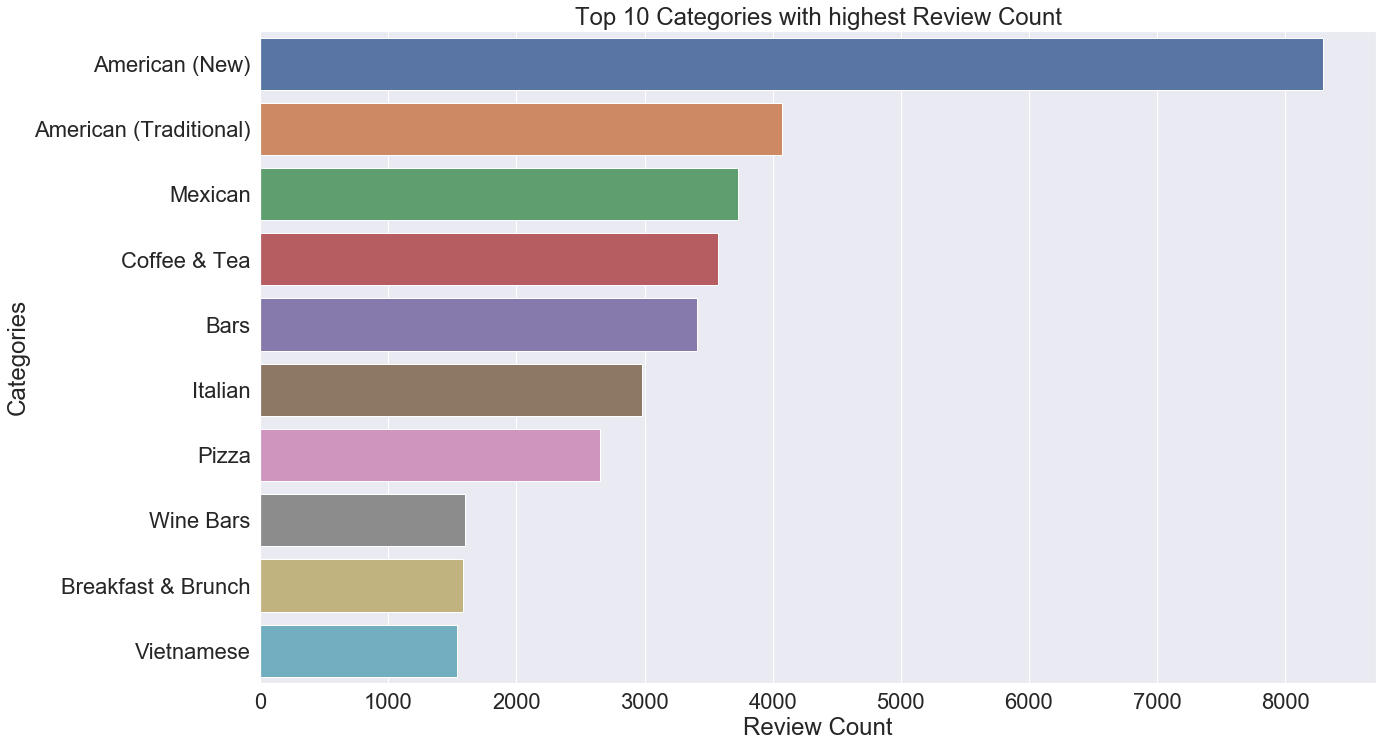

In [85]:
plt.figure(figsize=(20,12))
sns.set(font_scale=2)
f = sns.barplot( x = 'review_count', y= 'Categories', data = review.iloc[0:10])
f.set_title('Top 10 Categories with highest Review Count')
f.set_ylabel('Categories')
f.set_xlabel('Review Count');

In [13]:
gmap = gmplot.GoogleMapPlotter(41.4, -81.7, 13)
#gmap = gmplot.GoogleMapPlotter.from_geocode("Cleveland")
gmap.scatter(yelp['latitude'], yelp['longitude'], '#3B0B39', size=40, marker=False)
gmap.draw("my_map.html")
gmap